In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
import warnings

In [2]:
#树模型的可视化展示
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data[:,2:]
y=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)


DecisionTreeClassifier(max_depth=2)

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True 
)

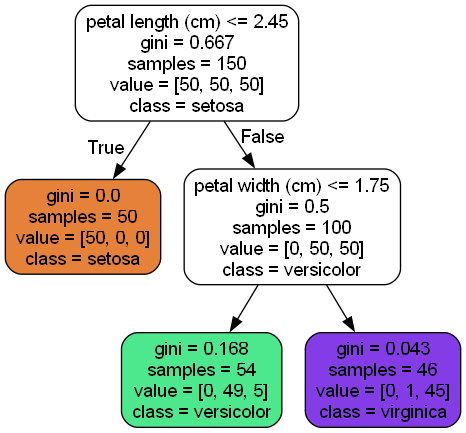

In [4]:
from IPython.display import Image
Image(filename='iris_tree.png',width=500,height=400)

In [24]:
# 决策的边界

In [5]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                         n_estimators=500,
                         max_samples=100,
                         bootstrap=True,
                         n_jobs=-1,
                         random_state=42,
                          oob_score=True
                         
)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_


0.9253333333333333

In [8]:
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.904

In [9]:
bag_clf.oob_dec 

AttributeError: 'BaggingClassifier' object has no attribute 'oob_dec'

## 随机森林

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
from sklearn.datasets import load_iris
iris=load_iris()
rf_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rf_clf.feature_importances_):
   print(name,score)

sepal length (cm) 0.08203374260722321
sepal width (cm) 0.021972365733257556
petal length (cm) 0.4463744283012401
petal width (cm) 0.4496194633582791


### 以SVM分类器为例来掩饰AdaBoost的基本策略

TypeError: 'SVC' object is not callable

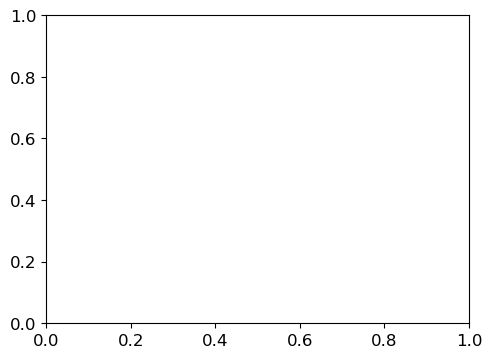

In [13]:
from sklearn.svm import SVC
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
m=len(X_train)
plt.figure(figsize=(12,4))
for subplot,learning_rate in((121,1),(122,0.5)):
      sample_weights=np.ones(m)
      plt.subplot(subplot)
      for i in range(5):
          svm_clf=SVC(kernel='rbf',C=0.05,random_state=42)
          svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
          y_pred=svm_clf.predict(X_train)
          sample_weights[y_pred!=y_train]*+(1+learning_rate)
          plot_decision_boundary(svm_clf,X,y)
          plt.title('learning_rate={}'.format(learning_rate))
      if subplot==121:
              plt.text(-0.7,-0.65,"1",fontsize=14)
              plt.text(-0.6,-0.10,"2",fontsize=14)
              plt.text(-0.5,0.10,"3",fontsize=14)
              plt.text(-0.4,0.55,"4",fontsize=14)
              plt.text(-0.3,0.90,"5",fontsize=14)
plt.show()

In [29]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [16]:
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [17]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

In [18]:
X_new=np.array([[0.8]])
y_pred=sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred

array([0.75026781])

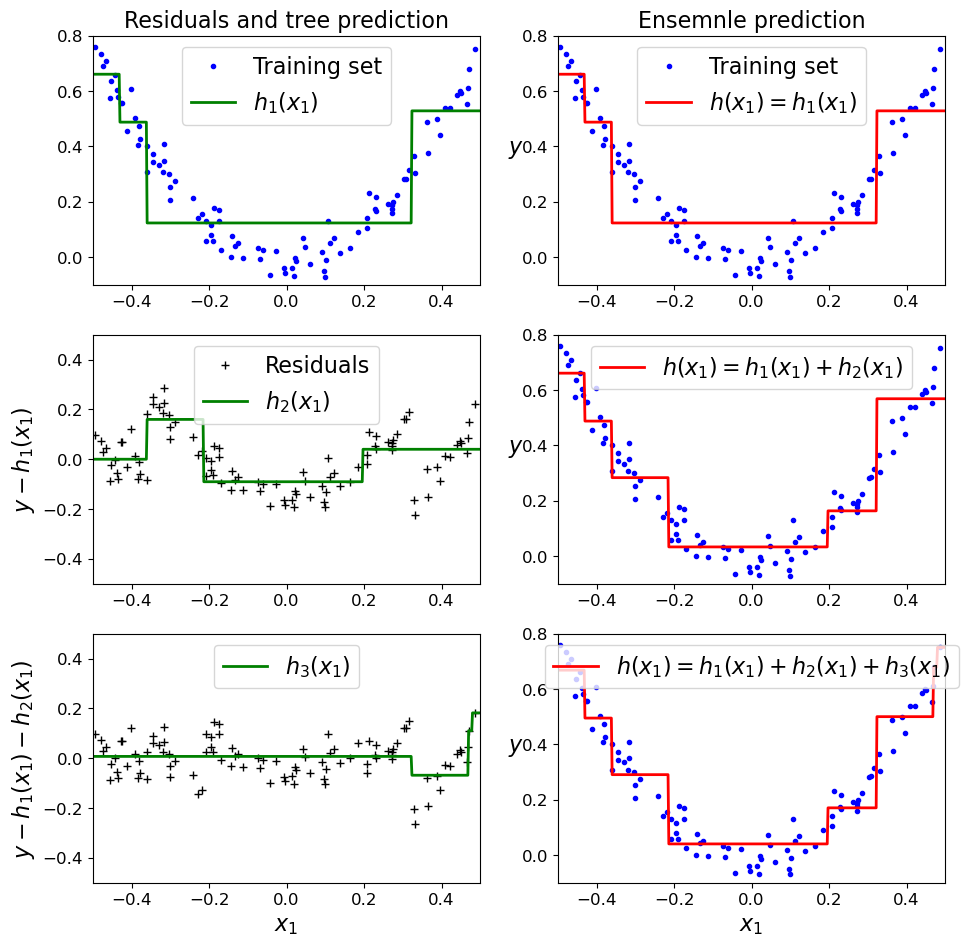

In [19]:
def plot_predictions(regressors,X,y,axes,label=None,style='r-',data_style='b.',data_label=None):
    x1=np.linspace(axes[0],axes[1],500)
    y_pred=sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    plt.plot(X[:,0],y,data_style,label=data_label)
    plt.plot(x1,y_pred,style,linewidth=2,label=label)
    if label or data_label:
        plt.legend(loc="upper center",fontsize=16)
    plt.axis(axes)
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h_1(x_1)$",style="g-",data_label="Training set")
plt.title("Residuals and tree prediction",fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)$",data_label="Training set")
plt.ylabel("$y$",fontsize=16,rotation=0)
plt.title("Ensemnle prediction",fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2],X,y2,axes=[-0.5,0.5,-0.5,0.5],label="$h_2(x_1)$",style='g-',data_style='k+',data_label="Residuals")
plt.ylabel("$y-h_1(x_1)$",fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1,tree_reg2],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)+h_2(x_1)$")
plt.ylabel("$y$",fontsize=16,rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3],X,y3,axes=[-0.5,0.5,-0.5,0.5],label="$h_3(x_1)$",style="g-",data_style="k+")
plt.ylabel("$y-h_1(x_1)-h_2(x_1)$",fontsize=16)
plt.xlabel("$x_1$",fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1,tree_reg2,tree_reg3],X,y,axes=[-0.5,0.5,-0.1,0.8],label="$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$")
plt.xlabel("$x_1$",fontsize=16)
plt.ylabel("$y$",fontsize=16,rotation=0)


plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gbdt=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0,
    random_state=41)
gbdt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=41)

In [32]:
gbdt_slow_1=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=0.1,
    random_state=41)
gbdt_slow_1.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=41)

In [33]:
gbdt_slow_2=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=200,
    learning_rate=0.1,
    random_state=41)
gbdt_slow_2.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=41)

Text(0.5, 1.0, 'learning_rate=0.1,n_estimators=3')

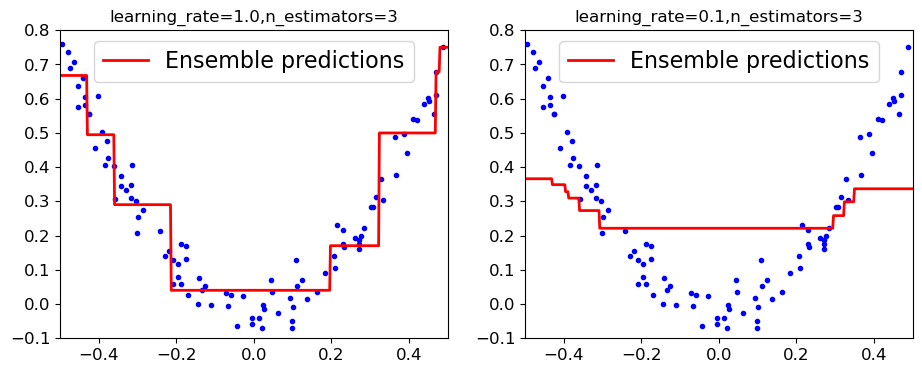

In [34]:
plt.figure(figsize=(11,4))
plt.subplot(121)

plot_predictions([gbdt],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbdt.learning_rate,gbdt.n_estimators))

plt.subplot(122)
plot_predictions([gbdt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbdt_slow_1.learning_rate,gbdt_slow_1.n_estimators))


Text(0.5, 1.0, 'learning_rate=0.1,n_estimators=3')

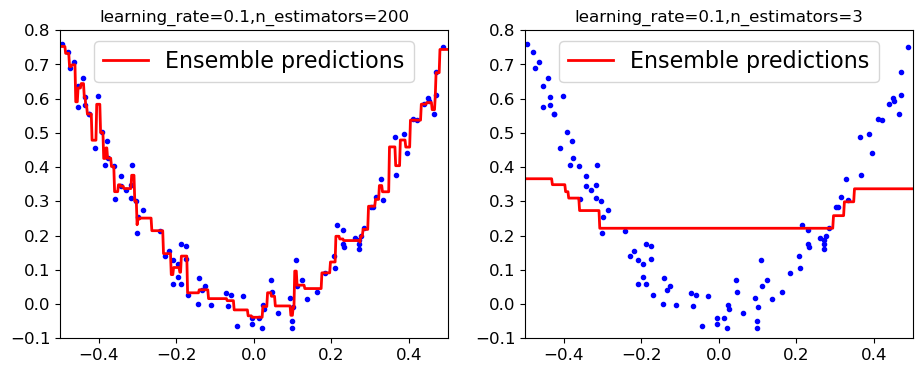

In [35]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_predictions([gbdt_slow_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbdt_slow_2.learning_rate,gbdt_slow_2.n_estimators))

plt.subplot(122)
plot_predictions([gbdt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label='Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbdt_slow_1.learning_rate,gbdt_slow_1.n_estimators))


### 提前停止策略

In [36]:
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42)
gbdt=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=120,
    random_state=42)
gbdt.fit(X_train,y_train)
errors=[mean_squared_error(y_val,y_pred) for y_pred in gbdt.staged_predict(X_val)]
bst_n_estimators=np.argmin(errors)
gbdt_best=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=bst_n_estimators,
    random_state=42)
gbdt_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=117, random_state=42)

In [37]:
min_error=np.min(errors)
min_error

0.003009529324545136

Text(0.5, 1.0, 'BEST MODEL(117 tree)')

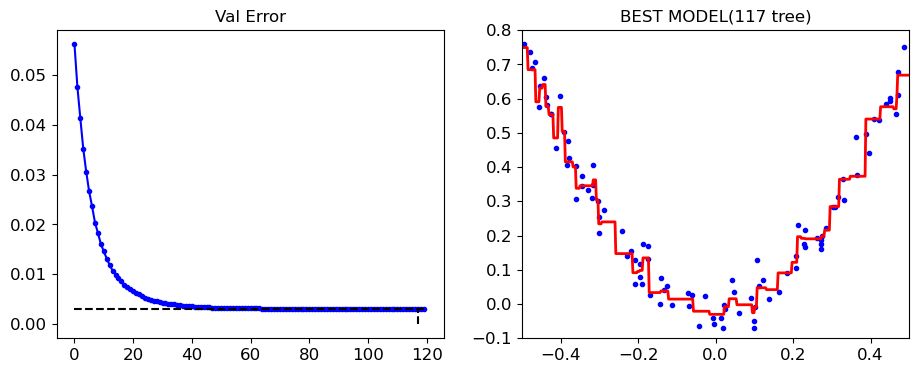

In [54]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(errors,'b.-')
plt.plot([bst_n_estimators,bst_n_estimators],[0,min_error],'k--')
plt.plot([0,120],[min_error,min_error],'k--')
plt.title('Val Error')

plt.subplot(122)
plot_predictions([gbdt_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title('BEST MODEL(%d tree)'%bst_n_estimators)

In [57]:
gbdt=GradientBoostingRegressor(
    max_depth=2,
    random_state=42,  warm_start=True)
error_going_up=0
min_val_error=float('inf')

for n_estimators in range(1,120):
    gbdt.n_estimators=n_estimators
    gbdt.fit(X_train,y_train)
    y_pred=gbdt.predict(X_val)
    val_error=mean_squared_error(y_val,y_pred)
    if val_error <min_val_error:
        min_val_error=val_error
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up==5:
            break


In [58]:
print(gbdt.n_estimators)

105
